## training data: the more the better

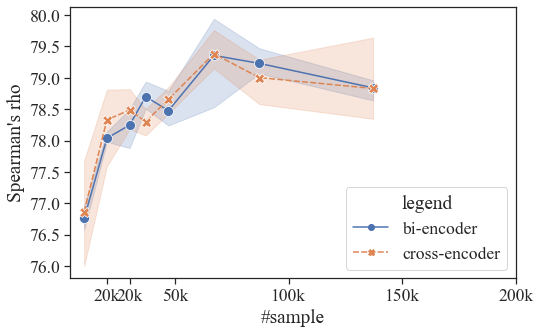

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(style="ticks", font="Times New Roman", font_scale=1.6)
plt.rcParams['font.family'] = 'Times New Roman'
#plt.rcParams.update({'font.size': 10})

fig=plt.figure(figsize=(8,5))
ax1 = fig.add_subplot(111)
#ax2 = ax1.twinx()

#plt.axhline(y=76.21, color='r', linestyle='--', label="SimCSE-BERT-base")
#plt.axvline(x=37081, color='purple', linestyle=':', label="full-in-domain-data")
#plt.axhline(y=78.32, color='b', linestyle='--', label="SimCSE-BERT-base + TEnc (cross)")
#plt.axvspan(10000, 37081, alpha=0.1, color='purple', label="in-domain training")

#plt.axhline(y=76.10, color='r', linestyle='--', label="SimCSE-RoBERTa-base")
#plt.axhline(y=78.86, color='b', linestyle='--', label="SimCSE-RoBERTa-base + TEnc (cross)")


# bert-base
indices = [0, 20000, 30000, 50000, 100000 , 150000, 200000]
mlama_en_performances = []
mlama_fi_performances = []
mlama_et_performances = []

xlbel_en_performances = []
xlbel_de_performances = []
xlbel_th_performances = []






#indices = [10000, 20000, 30000, 40000, 50000, 60000, 70000, 79345] * 3
#cross_performances = [77.69, 78.17, 78.26, 78.46, 78.62, 78.68, 78.80, 79.04] + [77.30, 78.24, 78.46, 78.21, 78.52, 77.99, 78.66, 79.31] + [77.59, 78.13, 78.11, 77.95, 78.41, 78.18, 78.30, 79.24]

model = len(mlama_en_performances)*3*["mLAMA"] + len(xlbel_en_performances)*[""] 
myDF_tmp = pd.DataFrame([indices, bi_performances + cross_performances, model]).T
myDF = myDF_tmp.rename(columns={0: '#iteration', 1: "performance"})

#sns.barplot(x=myDF.index,y='Frequency',data=indices,color='blue',ax=ax1)
#sns.histplot(x=, bins=10, binrange=[0,100000],ax=ax1, legend=True)
sns.lineplot(x="#sample", y="Spearman's rho", data=myDF, ax=ax1, #lw=3, 
             markersize=10, legend=True, hue="legend",  style='legend', markers=True,
             hue_order=['bi-encoder', 'cross-encoder'], 
             #markers={'bi-encoder': 'x', 'cross-encoder': 'o'}, 
             palette={'bi-encoder': sns.color_palette()[0], 'cross-encoder': sns.color_palette()[1]}
            )
#sns.scatterplot(x="index", y="Spearman's rho", data=myDF, size=20, legend=True)
sns.set(font_scale=1.0)  # crazy big

#fig._legend.set_title(None)

#ax2.axhline(.481, ls='--')
#ax2.axhline(.267, ls='--')

# and here
#xtick_names = ["0-10k","10-20k","10-20k","10-20k","10-20k","10-20k","10-20k","10-20k","10-20k","10-20k"]
#plt.xticks(myDF.index, xtick_names, rotation=60)
#plt.xticks(rotation=60)
ax1.set(xticks=[20000, 30000, 50000, 100000 , 150000, 200000])
ax1.set_xticklabels(["20k","20k","50k","100k","150k","200k"])

#plt.legend()
#plt.legend(title=None, loc='upper left', labels=['Hell Yeh', 'Nah Bruh'])


#plt.legend(loc='best', bbox_to_anchor=(0.5, 0.0, 0.5, 0.5))

# fig.legend(labels=["Multi-SimLex (en) word freq. distribution",
#                  "BERT+Mirror (w/ words of different freq.)"]
#            ,loc=1, bbox_to_anchor=(0.5, 0.37, 0.4, 0.5), prop={'size': 12.5})


#ax1.set_xlabel("word frequency rank in English Wikipedia")
#ax1.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=False)
plt.show()

In [473]:
fig.savefig("performance_against_num_sample_v2.pdf", format='pdf', dpi=1200, bbox_inches='tight')

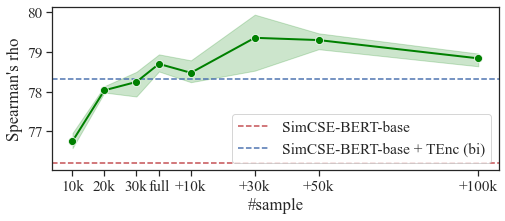

In [205]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(style="ticks", font="Times New Roman", font_scale=1.4)

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams.update({'font.size': 40})

fig=plt.figure(figsize=(8,3))
ax1 = fig.add_subplot(111)
#ax2 = ax1.twinx()

plt.axhline(y=76.21, color='r', linestyle='--', label="SimCSE-BERT-base")
plt.axhline(y=78.32, color='b', linestyle='--', label="SimCSE-BERT-base + TEnc (bi)")

#plt.axhline(y=76.10, color='r', linestyle='--', label="SimCSE-RoBERTa-base")
#plt.axhline(y=78.36, color='b', linestyle='--', label="SimCSE-RoBERTa-base + TEnc (bi)")


#plt.legend()

indices = [10000, 20000, 30000, 37081 , 47081, 67081, 87081, 137081] * 3
bi_performances = [76.73, 78.14, 78.50, 78.65, 78.40, 79.60, 79.07, 78.96] +[76.96, 77.99, 78.36, 78.51, 78.24, 78.53, 79.36, 78.92]+[76.58, 77.98, 77.88, 78.94, 78.79, 79.94, 79.47, 78.64]
#indices = [10000, 20000, 30000, 40000, 50000, 60000, 70000, 79345] * 3
#bi_performances = [74.87, 75.74, 76.61, 76.89, 77.51, 77.85, 77.86, 78.52]  + [74.13, 76.32, 76.35, 76.95, 77.59, 78.96, 78.38, 78.66]  + [74.59, 76.12, 76.68, 76.74, 77.19, 77.57, 77.52, 78.44]

myDF_tmp = pd.DataFrame([indices, bi_performances]).T
myDF = myDF_tmp.rename(columns={0: '#sample', 1: "Spearman's rho"})

#sns.barplot(x=myDF.index,y='Frequency',data=indices,color='blue',ax=ax1)
#sns.histplot(x=, bins=10, binrange=[0,100000],ax=ax1, legend=True)
sns.lineplot(x="#sample", y="Spearman's rho", data=myDF,  marker='o',ax=ax1, lw=2, 
             markersize=8, legend=True, color="green")
#plt.legend()

#sns.scatterplot(x="index", y="Spearman's rho", data=myDF, size=20, legend=True)

sns.set(font_scale=1.0)  # crazy big

#ax2.axhline(.481, ls='--')
#ax2.axhline(.267, ls='--')

# and here
#xtick_names = ["0-10k","10-20k","10-20k","10-20k","10-20k","10-20k","10-20k","10-20k","10-20k","10-20k"]
#plt.xticks(myDF.index, xtick_names, rotation=60)
#plt.xticks(rotation=60)
ax1.set(xticks= [10000, 20000, 30000, 37081 , 47081, 67081, 87081, 137081])
ax1.set_xticklabels(["10k","20k","30k","full","+10k","+30k","+50k","+100k"])


#fig.legend(labels=["Multi-SimLex (en) word freq. distribution",
#                 "BERT+Mirror (w/ words of different freq.)"]
#           ,loc=1, bbox_to_anchor=(0.5, 0.37, 0.4, 0.5), prop={'size': 12.5})


#ax1.set_xlabel("word frequency rank in English Wikipedia")
#ax1.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=False)
plt.show()

In [ ]:
fig.savefig("performance_against_word_freq_ticks_TNR_flat.pdf", format='pdf', dpi=1200, bbox_inches='tight')

## optimal cycle

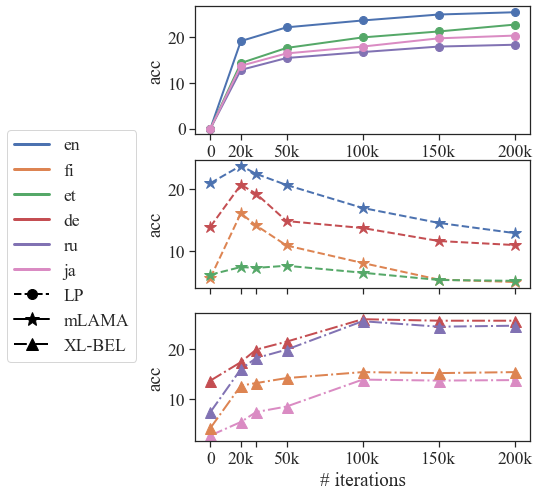

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(style="ticks", font="Times New Roman", font_scale=1.6)

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams.update({'font.size': 40})

#fig = plt.figure(figsize=(20,10))
fig, axs = plt.subplots(3, figsize=(6,8))
ax1, ax2, ax3 = axs

x1=[20.99, 23.82, 22.5, 20.69, 16.96, 14.53, 12.87] # mlama en
x2=[5.63, 16.09, 14.12, 10.86, 8.02, 5.32, 4.93] # mlama fin
x3=[6.12, 7.36, 7.22, 7.57, 6.44, 5.26, 5.12] # mlama et
x4=[13.92, 20.73, 19.29, 14.83, 13.7, 11.59, 10.93] # mlama de

xx1=[13.7, 17.4, 19.9, 21.5, 26.0, 25.7, 25.7] # XL-BEL de
xx2=[7.4, 16.0,18.2,19.9,25.6,24.5,24.7] # XL-BEL ru
xx3=[2.7, 5.4, 7.4, 8.5, 13.9, 13.7, 13.8] # XL-BEL jp
xx4=[4.2, 12.7, 13.2, 14.2, 15.4, 15.2, 15.4] # XL-BEL fin


xxx1=[0, 19.1, 22.1, 23.6, 24.9, 25.4] # LP en
xxx2=[0, 12.8, 15.4, 16.7, 17.9, 18.3] # LP ru
xxx3=[0, 14.3, 17.6, 19.9, 21.2, 22.7] # LP et
xxx4=[0, 13.7, 16.4, 17.9, 19.7, 20.3] # XL-BEL jp

cycles = [0, 20000, 30000, 50000, 100000 , 150000, 200000]
cycles_lp = [0, 20000, 50000, 100000 , 150000, 200000]


ax2.plot(cycles, x1, marker='*', color=sns.color_palette()[0], linestyle='--', linewidth=2,markersize=13)
ax2.plot(cycles, x2, marker='*', color=sns.color_palette()[1], linestyle='--', linewidth=2,markersize=13)
ax2.plot(cycles, x3, marker='*', color=sns.color_palette()[2], linestyle='--', linewidth=2,markersize=13)
ax2.plot(cycles, x4, marker='*', color=sns.color_palette()[3], linestyle='--', linewidth=2,markersize=13)


ax3.plot(cycles, xx1, marker='^', color=sns.color_palette()[3], linestyle='-.', linewidth=2, markersize=11)
ax3.plot(cycles, xx2, marker='^', color=sns.color_palette()[4], linestyle='-.', linewidth=2, markersize=11)
ax3.plot(cycles, xx3, marker='^', color=sns.color_palette()[6], linestyle='-.', linewidth=2, markersize=11)
ax3.plot(cycles, xx4, marker='^', color=sns.color_palette()[1], linestyle='-.', linewidth=2, markersize=11)

ax1.plot(cycles_lp, xxx1, marker='o', color=sns.color_palette()[0], linestyle='-', linewidth=2, markersize=8)
ax1.plot(cycles_lp, xxx2, marker='o', color=sns.color_palette()[4], linestyle='-', linewidth=2, markersize=8)
ax1.plot(cycles_lp, xxx3, marker='o', color=sns.color_palette()[2], linestyle='-', linewidth=2, markersize=8)
ax1.plot(cycles_lp, xxx4, marker='o', color=sns.color_palette()[6], linestyle='-', linewidth=2, markersize=8)


plt.plot([],[], color=sns.color_palette()[0], linestyle='-', linewidth=3,label = "en")
plt.plot([],[], color=sns.color_palette()[1], linestyle='-', linewidth=3,label = "fi")
plt.plot([],[], color=sns.color_palette()[2], linestyle='-', linewidth=3,label = "et")
plt.plot([],[], color=sns.color_palette()[3], linestyle='-', linewidth=3,label = "de")
plt.plot([],[], color=sns.color_palette()[4], linestyle='-', linewidth=3,label = "ru")
plt.plot([],[], color=sns.color_palette()[6], linestyle='-', linewidth=3,label = "ja")
plt.plot([],[], color="black", linestyle='--',marker='o', linewidth=2, markersize=10, label="LP")
plt.plot([],[], color="black", linestyle='-', marker='*', linewidth=2, markersize=14, label="mLAMA")
plt.plot([],[], color="black", linestyle='-.',marker='^', linewidth=2, markersize=12, label="XL-BEL")
#plt.plot(cycles, xx2, marker='o', color="blue",linestyle='--', )


#ax1.set(xticks=[1,2,3])
#ax1.set_xticklabels([1,2,3])

ax2.set(xticks=[0, 20000, 30000, 50000, 100000 , 150000, 200000])
#ax1.set_xticklabels(["0", "20k", "", "50k","100k","150k","200k"])
ax2.set_xticklabels([])
ax2.set_ylabel("acc")


ax3.set(xticks=[0, 20000, 30000, 50000, 100000 , 150000, 200000])
ax3.set_xticklabels(["0", "20k", "", "50k","100k","150k","200k"])
ax3.set_ylabel("acc")

ax1.set(xticks=[0, 20000, 50000, 100000 , 150000, 200000])
ax1.set_xticklabels(["0", "20k", "50k","100k","150k","200k"])
ax1.set_ylabel("acc")


plt.xlabel("# iterations")


plt.legend(loc='best', bbox_to_anchor=(-0.65, 0.9, 0.5, 1.6))
#plt.legend(loc='best',)

plt.show()

In [36]:
#fig.savefig("iterations_against_performance_mlama.pdf", format='pdf', dpi=1200, bbox_inches='tight')
fig.savefig("iterations_against_performance_lp_mlama_and_xlbel.pdf", format='pdf', dpi=1200, bbox_inches='tight')

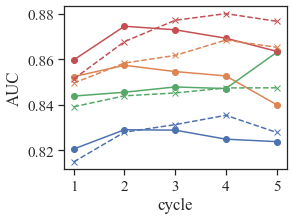

In [603]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(style="ticks", font="Times New Roman", font_scale=1.4)

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams.update({'font.size': 40})

fig=plt.figure(figsize=(4,3))
ax1 = fig.add_subplot(111)

x1=[0.820595003287311, 0.8290415662210533, 0.8288680692526845, 0.8249050332383665, 0.8238229600409087]
x2=[0.8523540799181825, 0.8573261377748557, 0.8545821462488128, 0.8526691138870626, 0.840051775147929]
x3=[0.8438207685002556, 0.8455123639418511, 0.847824895901819, 0.8471217766089562, 0.8629967492146979]
x4=[0.8596911753963037, 0.8744795090948938, 0.8729180363795748, 0.8692152458178098, 0.8634875630067936]


xx1=[0.8149335232668565, 0.8279640587332895, 0.8312878953904594, 0.8353833369859011, 0.8278727445394112]
xx2=[0.8495096427788738, 0.8582986339396594, 0.8616658448389218, 0.8684208123310688, 0.8652316641098692]
xx3=[0.8391180875155234, 0.8439371940974505, 0.8451836328438892, 0.8474002849002849, 0.8474459419972241]
xx4=[0.8513267952370517, 0.8677131273285119, 0.87709337789466, 0.8800131492439185, 0.876659635473738]



cycles = [1,2,3,4,5]

plt.plot(cycles, x1, marker='o', color=sns.color_palette()[0],)
plt.plot(cycles, x2, marker='o', color=sns.color_palette()[1],)
plt.plot(cycles, x3, marker='o', color=sns.color_palette()[2],)
plt.plot(cycles, x4, marker='o', color=sns.color_palette()[3],)

plt.plot(cycles, xx1, marker='x', color=sns.color_palette()[0], linestyle='--')
plt.plot(cycles, xx2, marker='x', color=sns.color_palette()[1],linestyle='--', )
plt.plot(cycles, xx3, marker='x', color=sns.color_palette()[2],linestyle='--',)
plt.plot(cycles, xx4, marker='x', color=sns.color_palette()[3],linestyle='--', )





ax1.set(xticks=[1,2,3,4,5])
ax1.set_xticklabels([1,2,3,4,5])

plt.xlabel("cycle")
plt.ylabel("AUC")

#plt.legend()
plt.show()

In [604]:
fig.savefig("cycle_against_dev_score_qqp_v2.pdf", format='pdf', dpi=1200, bbox_inches='tight')

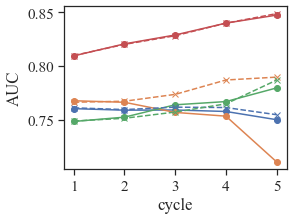

In [605]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(style="ticks", font="Times New Roman", font_scale=1.4)

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams.update({'font.size': 40})

fig=plt.figure(figsize=(4,3))
ax1 = fig.add_subplot(111)

x1=[0.7601606283923922, 0.7587324638646293, 0.7589089785815437, 0.7575329661292329, 0.7498746344340095]
x2=[0.7675261061254619, 0.7660778831071404, 0.7566624276389953, 0.7531762619799335, 0.7106081333167518]
x3=[0.7482258265101035, 0.7522295012255737, 0.7637430748061347, 0.7667358015974581, 0.7794528846115273]
x4=[0.8092999185625283, 0.8204444159168135, 0.8287245608193492, 0.8397687657208419, 0.8472225008123688]

xx1=[0.7609348861279491, 0.7592941016002663, 0.7615326291465915, 0.7611996582033209, 0.7545161691492392]
xx2=[0.7661300351825926, 0.7670727842388405, 0.7734473725383217, 0.7868263857408202, 0.78950218838132]
xx3=[0.7486089436797703, 0.7512125357542594, 0.7569793517898191, 0.7646216366925956, 0.7867220815899162]
xx4=[0.8095967842227937, 0.8199830706339688, 0.8280465838384731, 0.8397085902491666, 0.8485985132646798]




cycles = [1,2,3,4,5]
plt.plot(cycles, x1, marker='o', color=sns.color_palette()[0],)
plt.plot(cycles, x2, marker='o', color=sns.color_palette()[1],)
plt.plot(cycles, x3, marker='o', color=sns.color_palette()[2],)
plt.plot(cycles, x4, marker='o', color=sns.color_palette()[3],)

plt.plot(cycles, xx1, marker='x', color=sns.color_palette()[0], linestyle='--')
plt.plot(cycles, xx2, marker='x', color=sns.color_palette()[1],linestyle='--', )
plt.plot(cycles, xx3, marker='x', color=sns.color_palette()[2],linestyle='--',)
plt.plot(cycles, xx4, marker='x', color=sns.color_palette()[3],linestyle='--', )



ax1.set(xticks=[1,2,3,4,5])
ax1.set_xticklabels([1,2,3,4,5])

plt.xlabel("cycle")
plt.ylabel("AUC")

#plt.legend()
plt.show()

In [606]:
fig.savefig("cycle_against_dev_score_qnli_v2.pdf", format='pdf', dpi=1200, bbox_inches='tight')

### ablation: sequntial vs. refreshing

In [573]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from itertools import cycle


sns.set(style="ticks", font="Times New Roman", font_scale=1.4)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams.update({'font.size': 12})

In [574]:
fig=plt.figure(figsize=(10,5))
#ax1 = fig.add_subplot(111)

<Figure size 720x360 with 0 Axes>

[(76.0, 80.0)]

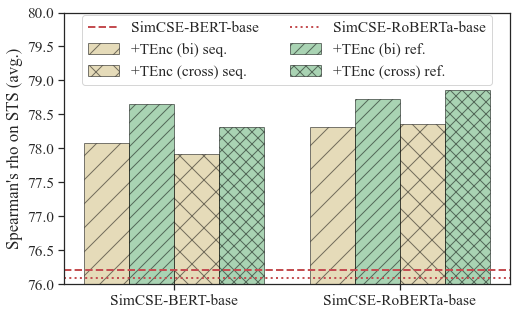

In [589]:
#df = pd.DataFrame([[1,2,3,4],[, ,  ], ["sequential", "sequential", "refreshing", "refreshing"]]).T
#df = df.rename(columns={0: "index", 1: "score", 2:"mode"})

pos = list(range(2))
width = 0.1 # the width of a bar

labels = ['SimCSE-BERT-base', 'SimCSE-RoBERTa-base']


# Plotting the bars
fig, ax = plt.subplots(figsize=(8,5))

bar1=plt.bar(0, 78.08, width,
                 alpha=0.5,
                 color='y',
                 hatch='/', # this one defines the fill pattern
                 edgecolor='black',
                label='+TEnc (bi) seq.')

plt.bar(0 + width , 78.65, width,
                 alpha=0.5,
                 color='g',
                 hatch='//',
                 edgecolor='black',
                 label='+TEnc (bi) ref.')

plt.bar(0 + width*2, 77.92, width,
                 alpha=0.5,
                 color='y',
                 hatch='x',
                 edgecolor='black',
                label='+TEnc (cross) seq.')

plt.bar(0 + width*3, 78.32, width,
                 alpha=0.5,
                 color='g',
                 hatch='xx',
                 edgecolor='black',
                label='+TEnc (cross) ref.')


bar2=plt.bar(0.5, 78.32, width,
                 alpha=0.5,
                 color='y',
                 hatch='/', # this one defines the fill pattern
                 edgecolor='black')

plt.bar(0.5 + width , 78.72, width,
                 alpha=0.5,
                 color='g',
                 hatch='//',
                 edgecolor='black')

plt.bar(0.5 + width*2, 78.36, width,
                 alpha=0.5,
                 color='y',
                 hatch='x',
                 edgecolor='black',
                   )

plt.bar(0.5 + width*3, 78.86, width,
                 alpha=0.5,
                 color='g',
                 hatch='xx',
                 edgecolor='black')

plt.axhline(y=76.21, color='r', linestyle='--', lw=2, label="SimCSE-BERT-base")
plt.axhline(y=76.10, color='r', linestyle=':', lw=2, label="SimCSE-RoBERTa-base")

ax.set_ylabel("Spearman's rho on STS (avg.)")
# ax.set_xlabel('Context-Aware Lexical Semantic Tasks')
#ax.xaxis.grid(True)
#ax.set_title('')
ax.set_xticks([0.15,0.65])
ax.set_xticklabels(labels)

handles, labels = ax.get_legend_handles_labels()

import itertools
def flip(items, ncol):
    return itertools.chain(*[items[i::ncol] for i in range(ncol)])

plt.legend(flip(handles, 2), flip(labels, 2), loc=9, ncol=2,  bbox_to_anchor=(0.5,1.02))
#plt.legend(["SimCSE-BERT-base", "SimCSE-RoBERTa-base", '+TEnc (bi) seq.','+TEnc (bi) ref.','+TEnc (cross) seq.','+TEnc (cross) ref.'], 
#            loc=2, ncol=2, bbox_to_anchor=(0.04,1.03))

#plt.legend(['+TEnc (bi) seq.','+TEnc (bi) ref.','+TEnc (cross) seq.','+TEnc (cross) ref.'],  loc=2, ncol=2)

ax.set(ylim=(76,80.0))


In [590]:
fig.savefig("ablation_seq_ref_v2.pdf", format='pdf', dpi=800, bbox_inches='tight')

[(76.0, 79.2)]

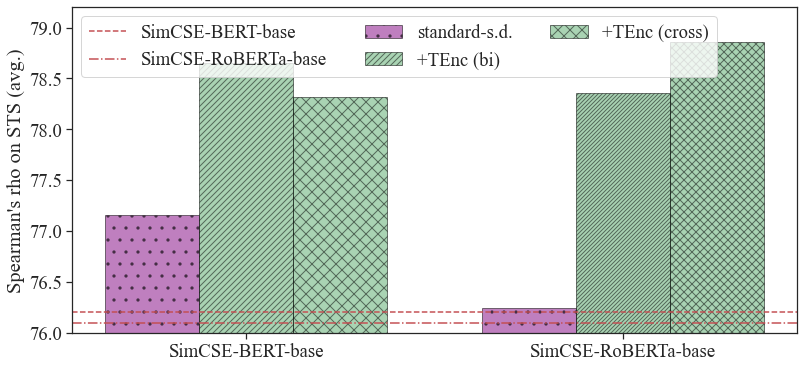

In [436]:
#df = pd.DataFrame([[1,2,3,4],[, ,  ], ["sequential", "sequential", "refreshing", "refreshing"]]).T
#df = df.rename(columns={0: "index", 1: "score", 2:"mode"})


pos = list(range(2))
width = 0.1 # the width of a bar

labels = ['SimCSE-BERT-base', 'SimCSE-RoBERTa-base']


# Plotting the bars
fig, ax = plt.subplots(figsize=(13,6))


bar1=plt.bar(0, 77.16, width,
                 alpha=0.5,
                 color='purple',
                 hatch='.', # this one defines the fill pattern
                 edgecolor='black')

plt.bar(0 + width, 78.65, width,
                 alpha=0.5,
                 color='g',
                 hatch='////',
                 edgecolor='black')

plt.bar(0 + width*2, 78.32, width,
                 alpha=0.5,
                 color='g',
                 hatch='xx',
                 edgecolor='black')



bar2=plt.bar(0.4, 76.25, width,
                 alpha=0.5,
                 color='purple',
                 hatch='.', # this one defines the fill pattern
                 edgecolor='black')

plt.bar(0.4 + width, 78.36, width,
                 alpha=0.5,
                 color='g',
                 hatch='//////',
                 edgecolor='black')

plt.bar(0.4 + width*2, 78.86, width,
                 alpha=0.5,
                 color='g',
                 hatch='xxx',
                 edgecolor='black')


ax.set_ylabel("Spearman's rho on STS (avg.)")
# ax.set_xlabel('Context-Aware Lexical Semantic Tasks')
#ax.xaxis.grid(True)
#ax.set_title('')
ax.set_xticks([0.1,0.5])
ax.set_xticklabels(labels)
plt.axhline(y=76.21, color='r', linestyle='--', label="SimCSE-BERT-base")
plt.axhline(y=76.10, color='r', linestyle='-.', label="SimCSE-RoBERTa-base")


plt.legend(["SimCSE-BERT-base", "SimCSE-RoBERTa-base", 'standard-s.d.', '+TEnc (bi)','+TEnc (cross)'], 
            loc=2, ncol=3)
ax.set(ylim=(76,79.2))



In [433]:
fig.savefig("ablation_sd_sts.pdf", format='pdf', dpi=800, bbox_inches='tight')

[(70.0, 81.0)]

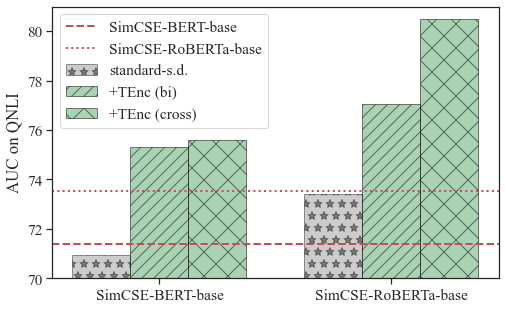

In [598]:
#df = pd.DataFrame([[1,2,3,4],[, ,  ], ["sequential", "sequential", "refreshing", "refreshing"]]).T
#df = df.rename(columns={0: "index", 1: "score", 2:"mode"})

sns.set(style="ticks", font="Times New Roman", font_scale=1.4)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams.update({'font.size': 12})

pos = list(range(2))
width = 0.1 # the width of a bar

labels = ['SimCSE-BERT-base', 'SimCSE-RoBERTa-base']


# Plotting the bars
fig, ax = plt.subplots(figsize=(8,5))


bar1=plt.bar(0, 70.95, width,
                 alpha=0.4,
                 color='grey',
                 hatch='*', # this one defines the fill pattern
                 edgecolor='black')

plt.bar(0 + width, 75.30, width,
                 alpha=0.5,
                 color='g',
                 hatch='//',
                 edgecolor='black')

plt.bar(0 + width*2, 75.61, width,
                 alpha=0.5,
                 color='g',
                 hatch='x',
                 edgecolor='black')




bar2=plt.bar(0.4, 73.40, width,
                 alpha=0.4,
                 color='grey',
                 hatch='*', # this one defines the fill pattern
                 edgecolor='black')

plt.bar(0.4 + width, 77.04, width,
                 alpha=0.5,
                 color='g',
                 hatch='//',
                 edgecolor='black')

plt.bar(0.4 + width*2, 80.49, width,
                 alpha=0.5,
                 color='g',
                 hatch='x',
                 edgecolor='black')


ax.set_ylabel("AUC on QNLI")
# ax.set_xlabel('Context-Aware Lexical Semantic Tasks')
#ax.xaxis.grid(True)
#ax.set_title('')
ax.set_xticks([0.1,0.5])
ax.set_xticklabels(labels)
plt.axhline(y=71.38, color='r', linestyle='--', lw=2, label="SimCSE-BERT-base")
plt.axhline(y=73.54, color='r', linestyle=':', lw=2, label="SimCSE-RoBERTa-base")


plt.legend(["SimCSE-BERT-base", "SimCSE-RoBERTa-base", 'standard-s.d.', '+TEnc (bi)','+TEnc (cross)'], 
            loc=2, ncol=1)
ax.set(ylim=(70,81))




In [599]:
fig.savefig("ablation_sd_qnli_v2.pdf", format='pdf', dpi=800, bbox_inches='tight')

## SICK-R as a standalone task

[(66.0, 76.2)]

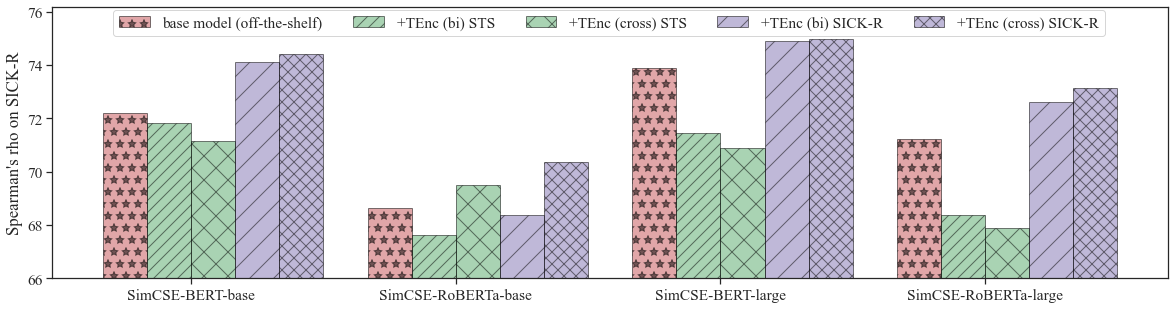

In [719]:
#df = pd.DataFrame([[1,2,3,4],[, ,  ], ["sequential", "sequential", "refreshing", "refreshing"]]).T
#df = df.rename(columns={0: "index", 1: "score", 2:"mode"})

sns.set(style="ticks", font="Times New Roman", font_scale=1.4)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams.update({'font.size': 12})

pos = list([0, 0.6,1.2, 1.8])
width = 0.1 # the width of a bar

labels = ['SimCSE-BERT-base', 'SimCSE-RoBERTa-base', 'SimCSE-BERT-large', 'SimCSE-RoBERTa-large']


# Plotting the bars
fig, ax = plt.subplots(figsize=(20,5))

bar1=plt.bar(0, 72.22, width,
                 alpha=0.5,
                 color=sns.color_palette()[3],
                 hatch='*', # this one defines the fill pattern
                 edgecolor='black',
                label="base model (off-the-shelf)")

plt.bar(0 + width , 71.84, width,
                 alpha=0.5,
                 color='g',
                 hatch='//',
                 edgecolor='black',
                 label='+TEnc (bi) STS')

plt.bar(0 + width*2, 71.16, width,
                 alpha=0.5,
                 color='g',
                 hatch='x',
                 edgecolor='black',
                label='+TEnc (cross) STS')

plt.bar(0 + width*3, 74.13, width,
                 alpha=0.5,
                 color=sns.color_palette()[4],
                 hatch='/',
                 edgecolor='black',
                label='+TEnc (bi) SICK-R')

plt.bar(0 + width*4, 74.43, width,
                 alpha=0.5,
                 color=sns.color_palette()[4],
                 hatch='xx',
                 edgecolor='black',
                label='+TEnc (cross) SICK-R')


bar2=plt.bar(pos[1], 68.62, width,
                 alpha=0.5,
                 color=sns.color_palette()[3],
                 hatch='*', # this one defines the fill pattern
                 edgecolor='black')

plt.bar(pos[1] + width , 67.63, width,
                 alpha=0.5,
                 color='g',
                 hatch='//',
                 edgecolor='black')

plt.bar(pos[1] + width*2, 69.51, width,
                 alpha=0.5,
                 color='g',
                 hatch='x',
                 edgecolor='black',)

plt.bar(pos[1] + width*3, 68.39, width,
                 alpha=0.5,
                 color=sns.color_palette()[4],
                 hatch='/',
                 edgecolor='black')

plt.bar(pos[1] + width*4, 70.38, width,
                 alpha=0.5,
                 color=sns.color_palette()[4],
                 hatch='xx',
                 edgecolor='black')



bar3=plt.bar(pos[2], 73.88, width,
                 alpha=0.5,
                 color=sns.color_palette()[3],
                 hatch='*', # this one defines the fill pattern
                 edgecolor='black')

plt.bar(pos[2] + width , 71.46, width,
                 alpha=0.5,
                 color='g',
                 hatch='//',
                 edgecolor='black')

plt.bar(pos[2] + width*2, 70.90, width,
                 alpha=0.5,
                 color='g',
                 hatch='x',
                 edgecolor='black',)

plt.bar(pos[2] + width*3, 74.92, width,
                 alpha=0.5,
                 color=sns.color_palette()[4],
                 hatch='/',
                 edgecolor='black')

plt.bar(pos[2] + width*4, 74.98, width,
                 alpha=0.5,
                 color=sns.color_palette()[4],
                 hatch='xx',
                 edgecolor='black')


bar4=plt.bar(pos[3], 71.23, width,
                 alpha=0.5,
                 color=sns.color_palette()[3],
                 hatch='*', # this one defines the fill pattern
                 edgecolor='black')

plt.bar(pos[3] + width , 68.36, width,
                 alpha=0.5,
                 color='g',
                 hatch='//',
                 edgecolor='black')

plt.bar(pos[3] + width*2, 67.90, width,
                 alpha=0.5,
                 color='g',
                 hatch='x',
                 edgecolor='black',)

plt.bar(pos[3] + width*3, 72.63, width,
                 alpha=0.5,
                 color=sns.color_palette()[4],
                 hatch='/',
                 edgecolor='black')

plt.bar(pos[3] + width*4, 73.13, width,
                 alpha=0.5,
                 color=sns.color_palette()[4],
                 hatch='xx',
                 edgecolor='black')

ax.set_ylabel("Spearman's rho on SICK-R")
# ax.set_xlabel('Context-Aware Lexical Semantic Tasks')
#ax.xaxis.grid(True)
#ax.set_title('')
ax.set_xticks([0.15,0.75, 0.75+0.6, 0.75+1.2])
ax.set_xticklabels(labels)

handles, labels = ax.get_legend_handles_labels()

import itertools
def flip(items, ncol):
    return itertools.chain(*[items[i::ncol] for i in range(ncol)])

#plt.legend(flip(handles, 2), flip(labels, 2), loc=9, ncol=2,  bbox_to_anchor=(0.5,1.02))
plt.legend(handles, labels, loc=7, ncol=5, bbox_to_anchor=(0.95,0.94))
#plt.legend(["SimCSE-BERT-base", "SimCSE-RoBERTa-base", '+TEnc (bi) seq.','+TEnc (bi) ref.','+TEnc (cross) seq.','+TEnc (cross) ref.'], 
#            loc=2, ncol=2, bbox_to_anchor=(0.04,1.03))

#plt.legend(['+TEnc (bi) seq.','+TEnc (bi) ref.','+TEnc (cross) seq.','+TEnc (cross) ref.'],  loc=2, ncol=2)

ax.set(ylim=(66,76.2))


In [720]:
fig.savefig("discuss_sickr_standalone.pdf", format='pdf', dpi=800, bbox_inches='tight')